# Housing Prices Predictor using Ordinal encoding

## 1.Reading, cleaning & splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config

#Reading Data
url = "https://drive.google.com/file/d/1fDMiQcQXPw-ZpxNYx1WkbuvFJDwqd1wu/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

house = pd.read_csv(path)
house.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object')

In [2]:
# X and y creation

X = house
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
 16  ExterQual     1460 non-null   object 
 17  ExterCond     1460 non-null   object 
 18  BsmtQual      1423 non-null 

In [3]:
X = X.drop_duplicates()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1454 non-null   int64  
 1   LotFrontage   1196 non-null   float64
 2   TotalBsmtSF   1454 non-null   int64  
 3   BedroomAbvGr  1454 non-null   int64  
 4   Fireplaces    1454 non-null   int64  
 5   PoolArea      1454 non-null   int64  
 6   GarageCars    1454 non-null   int64  
 7   WoodDeckSF    1454 non-null   int64  
 8   ScreenPorch   1454 non-null   int64  
 9   Expensive     1454 non-null   int64  
 10  MSZoning      1454 non-null   object 
 11  Condition1    1454 non-null   object 
 12  Heating       1454 non-null   object 
 13  Street        1454 non-null   object 
 14  CentralAir    1454 non-null   object 
 15  Foundation    1454 non-null   object 
 16  ExterQual     1454 non-null   object 
 17  ExterCond     1454 non-null   object 
 18  BsmtQual      1417 non-null   obj

In [4]:
# y creation
y = X.pop("Expensive")
y.info()

<class 'pandas.core.series.Series'>
Index: 1454 entries, 0 to 1459
Series name: Expensive
Non-Null Count  Dtype
--------------  -----
1454 non-null   int64
dtypes: int64(1)
memory usage: 22.7 KB


In [5]:
X.isna().sum()

LotArea           0
LotFrontage     258
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
ExterQual         0
ExterCond         0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
KitchenQual       0
FireplaceQu     684
dtype: int64

In [6]:
# Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.Building the `preprocessor`

We have included all the code to create the preprocessing pipeline in a single cell for compactness. Take your time to understand what's going on. If needed, create multiple cells and bring the code there step by step, analyzing the output each time. Writing a sketch of the pipeline with pen an paper is also a good idea.

In [7]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline

# 0. Set the config so that we can view our preprocessor
set_config(display="diagram")

# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

# 3. categorical pipeline

# # 3.1 defining ordinal & onehot columns
# .get_indexer() get's the index to solve the problem described above about losing column names

ordinal_cols = X_cat.columns.get_indexer(['Street', 'CentralAir','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','KitchenQual', 'FireplaceQu'])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', 'Condition1', 'Heating','Foundation'])

# # 3.2. defining the categorical encoder

# # # 3.2.1. we manually establish the order of the categories for our ordinal features, including "N_A"
Street_cats = ['N_A', 'Pave', 'Grvl']
CentralAir_cats =["N_A","N", "Y" ]
ExterQual_cats = ['N_A','Gd', 'TA', 'Ex', 'Fa']
ExterCond_cats =['N_A','TA', 'Gd', 'Fa', 'Po', 'Ex']
BsmtQual_cats =['N_A','Gd', 'TA', 'Ex','Fa']
BsmtCond_cats = ['N_A','TA', 'Gd', 'Fa', 'Po']
BsmtExposure_cats =['N_A','No', 'Gd', 'Mn', 'Av']
BsmtFinType1_cats =['N_A','GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ','LwQ']
KitchenQual_cats =['N_A','Gd', 'TA', 'Ex', 'Fa']
FireplaceQu_cats =['N_A','TA', 'Gd', 'Fa', 'Ex', 'Po']


ordinal_cats = [Street_cats,
                CentralAir_cats,
                ExterQual_cats,
                ExterCond_cats,
                BsmtQual_cats,
                BsmtCond_cats,
                BsmtExposure_cats,
                BsmtFinType1_cats,
                KitchenQual_cats,
                FireplaceQu_cats]

ordinal_encoder = OrdinalEncoder(categories=ordinal_cats)

# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_encoder, ordinal_cols),
        ("cat_onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_cols),
    ]
)


# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )


# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing


ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('columntransf...
                                                                                                               'Gd',
                                                                                                               'Fa',
                                                                                                               'Ex',
                                                                                                               'Po']]),
                                                                                   array([ 3,  4,  6,  7,  8,  9, 10, 11, 12, 13])),
                                                                                  ('cat_onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   array([0, 1, 2, 5]))]))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])

## 3.Decision Tree

In [8]:
from sklearn.model_selection import GridSearchCV

# full pipeline: preprocessor + model
full_pipeline = make_pipeline(full_preprocessing,
                              DecisionTreeClassifier())

# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"htree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'htree': 0.9114473878940357}

## 4.Error analysis

In [9]:
accuracy_score(search.predict(X_test), y_test)

0.9106529209621993

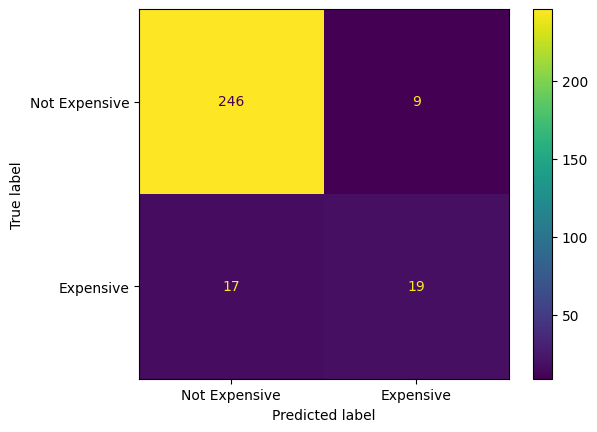

In [10]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['',''])

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

## 5.KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

In [12]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 2),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "standardscaler__with_std":[True, False]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

scores["knn"] = knn_search.best_score_

scores

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'htree': 0.9114473878940357, 'knn': 0.9234645552760101}

In [13]:
knn_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'uniform',
 'standardscaler__with_std': True}

In [27]:
accuracy_score(knn_search.predict(X_test), y_test)

0.9209621993127147

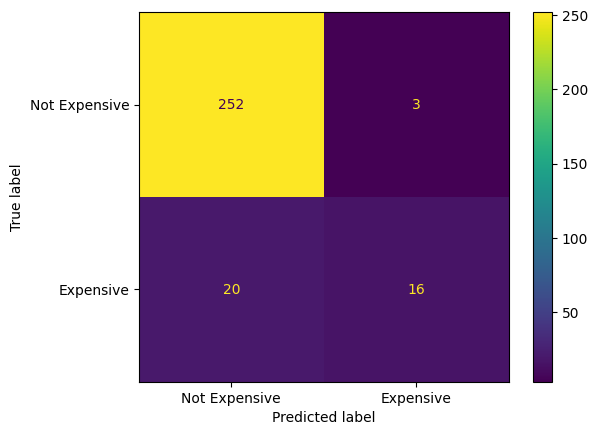

In [14]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search,
                                      X_test,
                                      y_test,
                                      display_labels=["Not Expensive", "Expensive"]);

### Rough Work

In [15]:
X['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [16]:
X['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
X['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [18]:
X['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [19]:
X['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [20]:
X['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [21]:
X['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [22]:
X['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [23]:
X['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [24]:
X['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [25]:
X_cat.columns

Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object')

In [26]:
X_num.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')